Use K_means to find different types of exoplanets

In [22]:
import numpy as np
import pandas as pd

%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance 

In [33]:
gaia = pd.read_csv('data/confirmed_mydata.csv', comment='#')
gaia_new = gaia.loc[:,['pl_orbper','pl_bmassj','pl_radj']]
gaia_np = gaia_new.to_numpy()
#standardize gaia data
scaler = StandardScaler()
scaler.fit(gaia_new)
gaia_np_std = scaler.transform(gaia_new)

In [42]:
def looping_kmeans(arr,k_cluster):
    sums=[]
    for k in k_cluster:
        km_alg = KMeans(n_clusters=k, init="random",random_state = 1, max_iter = 200)
        fit3 = km_alg.fit(arr)
        labels = fit3.labels_
        centers = fit3.cluster_centers_

        within_cluster_sumsqs = 0
        n = 0
        for c in centers:
            # Extract the cluster's center and associated points:
            cluster_center = c.reshape(1,-1)
            cluster_points = arr[labels==n]
            n = n+1

            # Compute the following for each cluster:
            cluster_spread = distance.cdist(cluster_points, cluster_center, 'euclidean')
            cluster_total = np.sum(cluster_spread)

            # Add this cluster's within sum of squares to within_cluster_sumsqs
            within_cluster_sumsqs = within_cluster_sumsqs + cluster_total
        sums.append(within_cluster_sumsqs)
    return sums

change to average sum

<IPython.core.display.Javascript object>


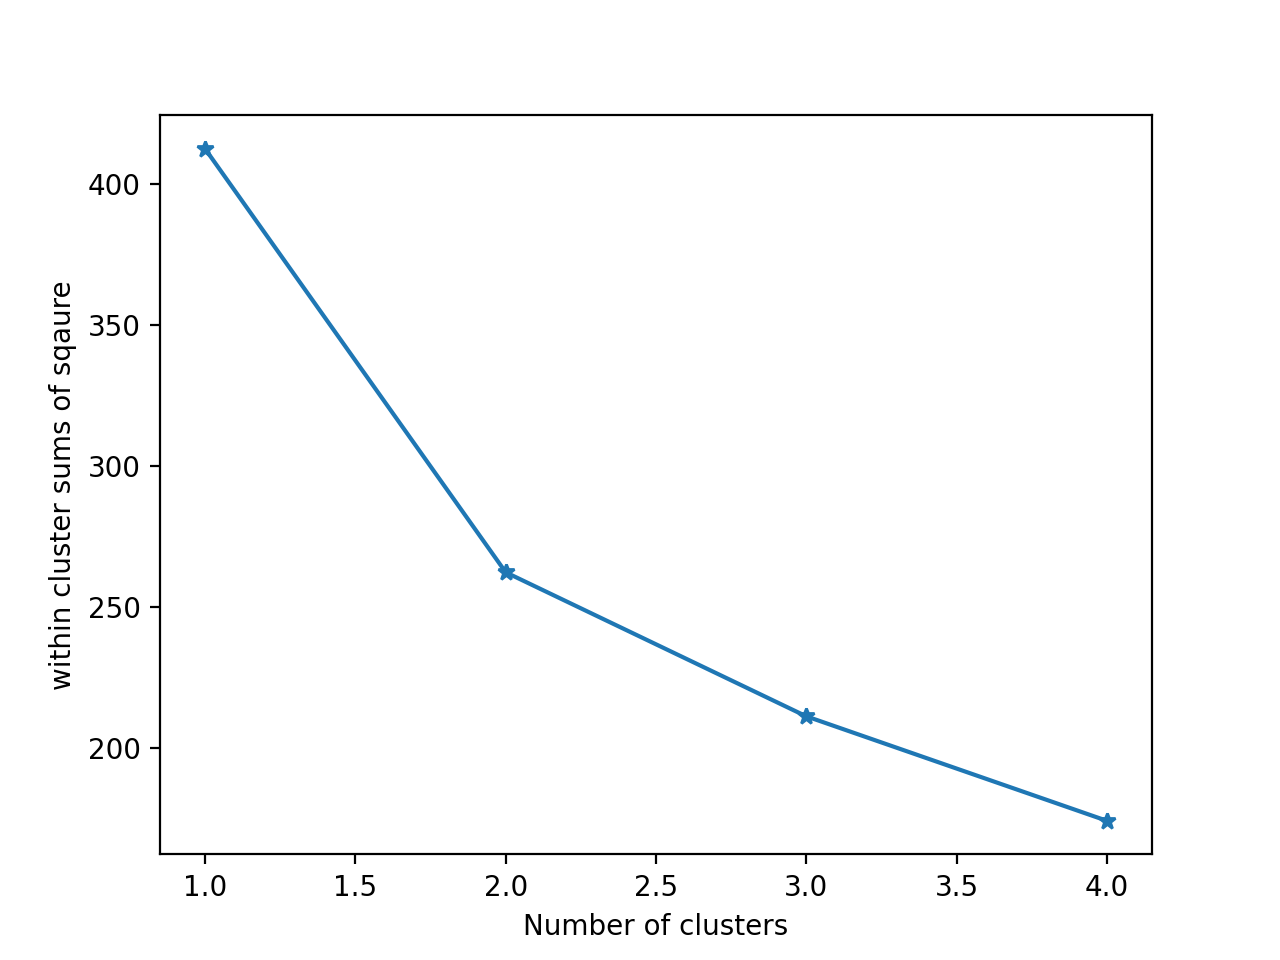

Text(0, 0.5, 'within cluster sums of sqaure')

In [44]:
plt.plot(list(range(1,5)),looping_kmeans(gaia_np_std,list(range(1,5))),"*-")
plt.xlabel("Number of clusters")
plt.ylabel("within cluster sums of sqaure")

<IPython.core.display.Javascript object>


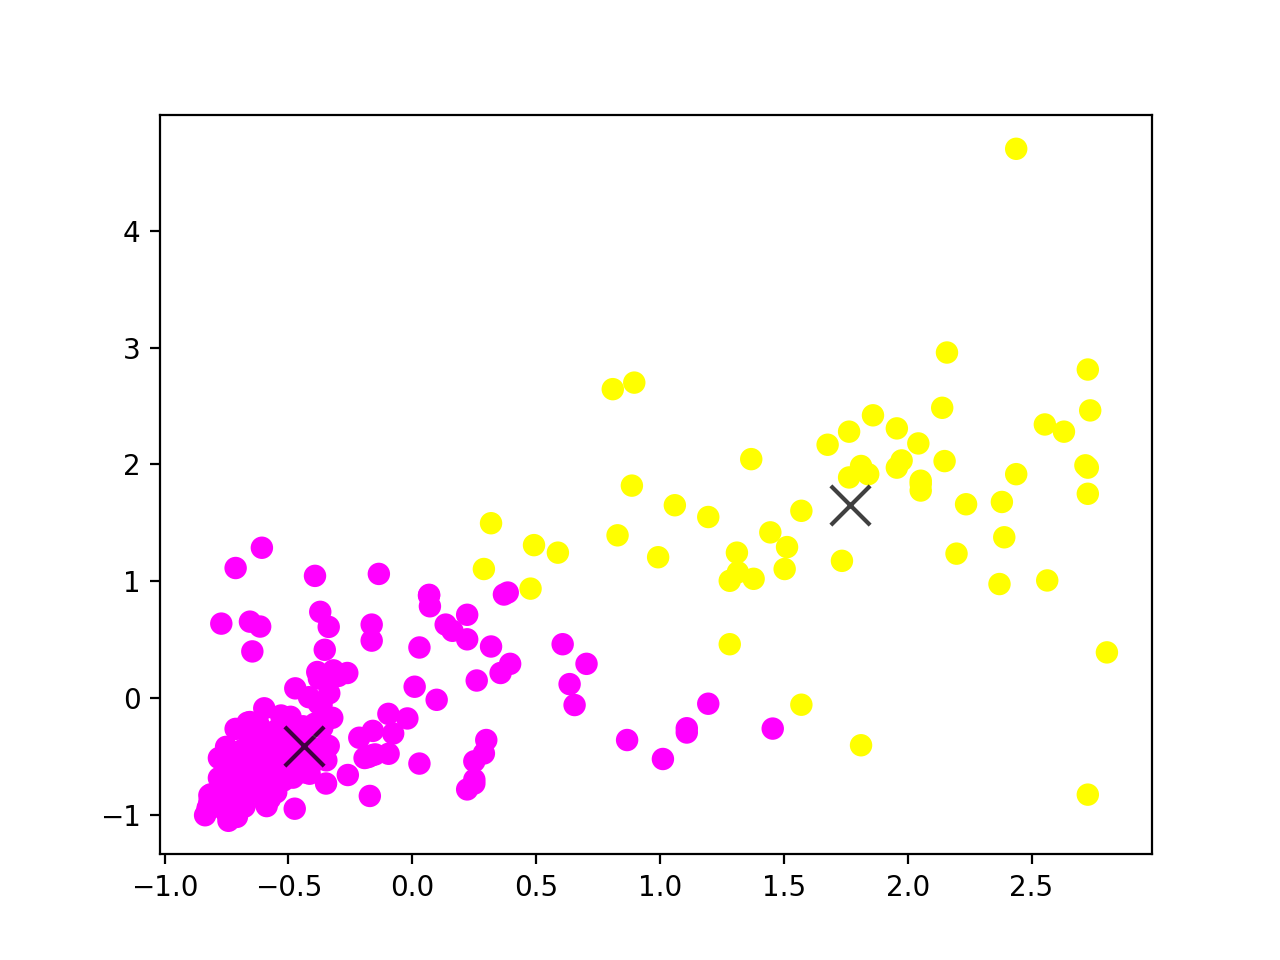

In [45]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(gaia_np_std)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot and color the points according to their label
plt.scatter(gaia_np_std[:,1], gaia_np_std[:,2], c=labels, s=50, cmap="spring")
# Add the cluster centers on top
plt.scatter(centers[:, 1], centers[:, 2], c='black', marker="x", s=200, alpha=0.75)

plot where is earth and jupyiter

<IPython.core.display.Javascript object>


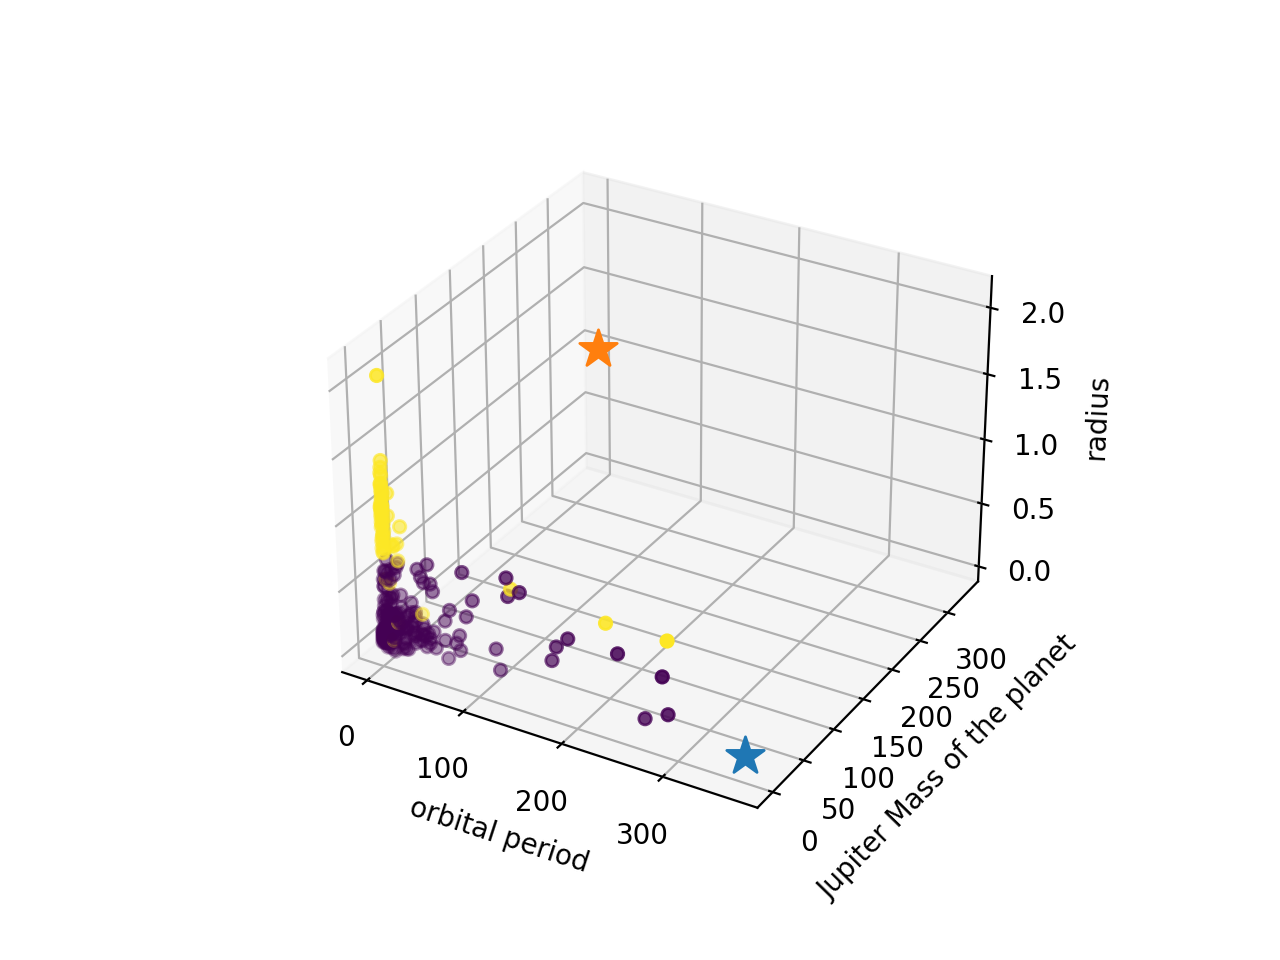

In [46]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the SCATTER() plot 
ax.scatter(gaia_np[:,0], gaia_np[:,1], gaia_np[:,2],c=labels);
#ax.scatter(centers[:, 0],centers[:, 1], centers[:, 2], c='red', marker="*", s=200, alpha=0.75)
ax.set_xlabel('orbital period')
ax.set_ylabel('Jupiter Mass of the planet')
ax.set_zlabel('radius');

# Plot Jupiter and Earth to the 3d plot
jup = [4,332.589,1,1]
earth = [365,1/317,0.0892147]
ax.scatter(earth[0],earth[1],earth[2],marker="*",s=200)
ax.scatter(jup[0],jup[1],jup[2],marker="*",s=200)